# INTRODUCTION

The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units on diverse product categories.

### Attribute Information:
- 1)	FRESH: annual spending (m.u.) on fresh products (Continuous); 
- 2)	MILK: annual spending (m.u.) on milk products (Continuous); 
- 3)	GROCERY: annual spending (m.u.)on grocery products (Continuous); 
- 4)	FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- 5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- 6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
- 7)	CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal) 
- 8)	REGION: customers Region - Lisbon, Oporto or Other (Nominal) 

### Region	Frequency 
Lisbon	77 
Oporto	47 
Other Region	316 
Total	440 

### Channel	Frequency 
Horeca	298 
Retail	142 
Total	440 

Our project goal is to use various clustering techniques to segment customers. Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Thus, there is no outcome to be predicted, and the algorithm just tries to find patterns in the data.

In [224]:
#Importing required numerical and data manipulation libraries
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#plotting libraries
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [225]:
data = pd.read_csv("C:\\Users\\prane\\Downloads\\DSE FILES\\ALL PROJECTS\\Whole sale customer segmentation\\Wholesale_customers_data.csv")
data.shape

(440, 8)

In [226]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [227]:
type(data)

pandas.core.frame.DataFrame

## Exploratory Data Analysis(EDA)

In [228]:
print('Descriptive Statastics of our Data:')
data.describe().T

Descriptive Statastics of our Data:


,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [229]:
print('Showing Meta Data :')
data.info()

Showing Meta Data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [230]:
#Checking for missing values
pd.isnull(data).sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [231]:
data.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [232]:
data.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

### Univarient Analysis

In [233]:
dataset = data.copy()

In [234]:
dataset['Channel'] = dataset['Channel'].map({1:'Horeca', 2:'Retail'})

In [235]:
dataset['Region'].replace([1,2,3],['Lisbon','Oporto','other'],inplace=True)

In [236]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,other,12669,9656,7561,214,2674,1338
1,Retail,other,7057,9810,9568,1762,3293,1776
2,Retail,other,6353,8808,7684,2405,3516,7844
3,Horeca,other,13265,1196,4221,6404,507,1788
4,Retail,other,22615,5410,7198,3915,1777,5185


In [237]:
def continous_data(i):
    if dataset[i].dtype!='object':
        print('--'*60)
        sns.boxplot(dataset[i])
        plt.title("Boxplot of "+str(i))
        plt.show()
        plt.title("histogram of "+str(i))        
        dataset[i].plot.hist(bins = 20)
        plt.show()
        plt.clf()

------------------------------------------------------------------------------------------------------------------------


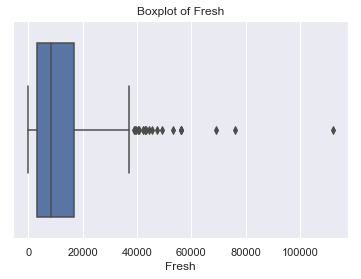

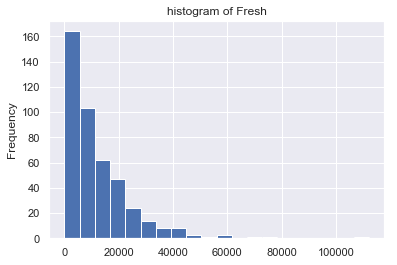

------------------------------------------------------------------------------------------------------------------------


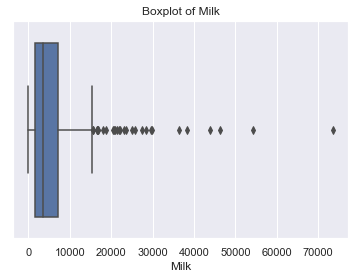

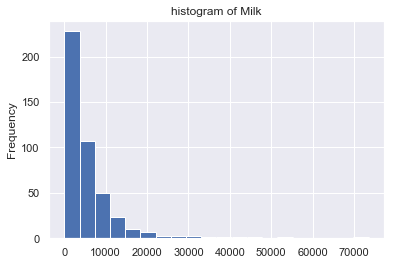

------------------------------------------------------------------------------------------------------------------------


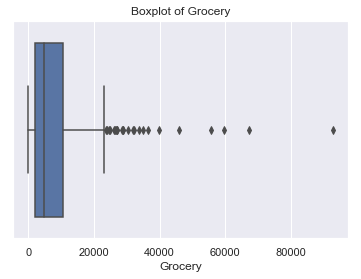

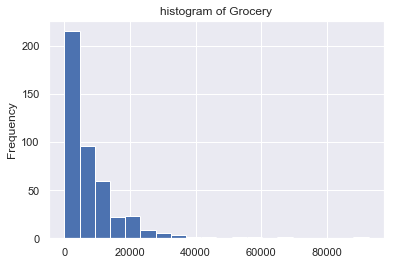

------------------------------------------------------------------------------------------------------------------------


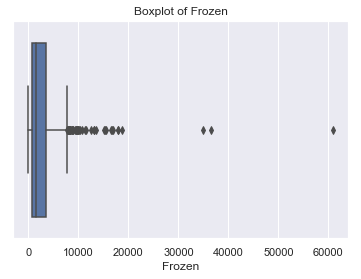

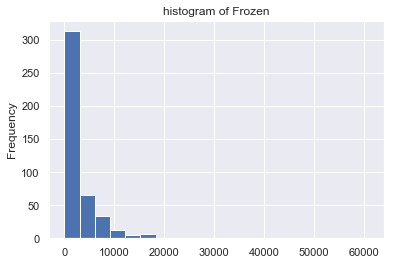

------------------------------------------------------------------------------------------------------------------------


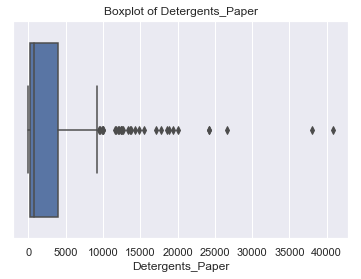

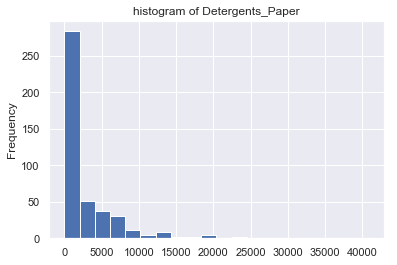

------------------------------------------------------------------------------------------------------------------------


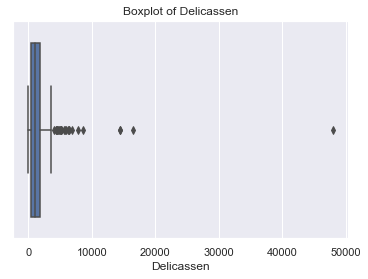

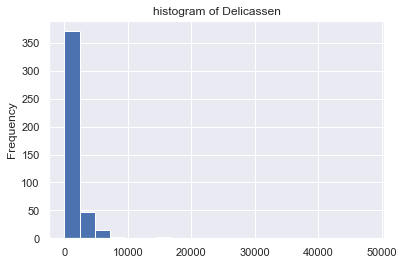

<Figure size 432x288 with 0 Axes>

In [238]:
sns.set() #Sets the default seaborn style
j=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for k in j:
    continous_data(i=k)

## Data Transformation

In [239]:
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,other,12669,9656,7561,214,2674,1338
1,Retail,other,7057,9810,9568,1762,3293,1776
2,Retail,other,6353,8808,7684,2405,3516,7844
3,Horeca,other,13265,1196,4221,6404,507,1788
4,Retail,other,22615,5410,7198,3915,1777,5185


In [240]:
# Scale the data using the natural logarithm
log_data = np.log(dataset[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']].copy())

In [241]:
log_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


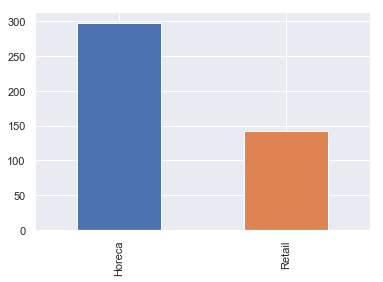

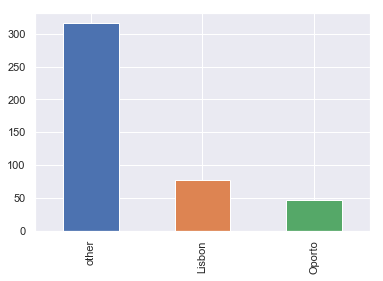

In [242]:
def categorical_data(i):
    dataset[i].value_counts().plot(kind='bar')

j_1 = ['Channel','Region']

for k in j_1:
    categorical_data(i=k)
    plt.show()    

In [243]:
dataset.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


Correlation Heat map of the data


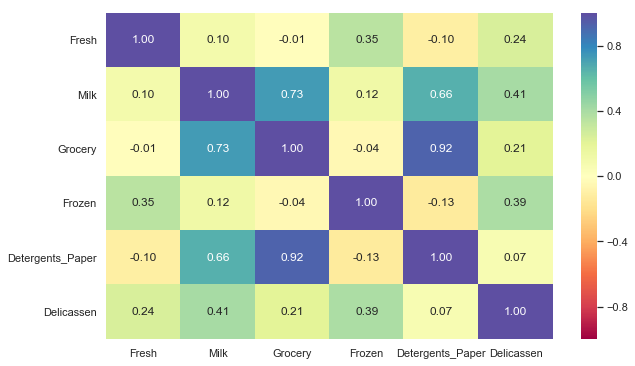

In [244]:
print('Correlation Heat map of the data')
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,cmap='Spectral')
plt.show()

In [245]:
def scatterplot(i,j):
    sns.regplot(data=log_data,x=i,y=j)
    plt.show()

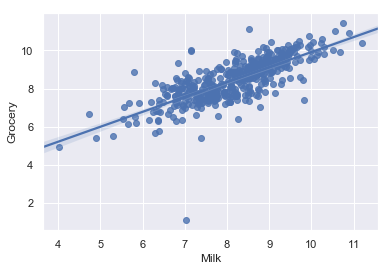

In [246]:
scatterplot(i='Milk',j='Grocery')

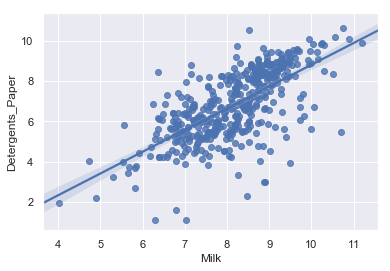

In [185]:
scatterplot(i='Milk',j='Detergents_Paper')

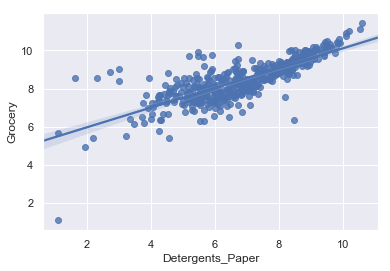

In [186]:
scatterplot(i='Detergents_Paper',j='Grocery')

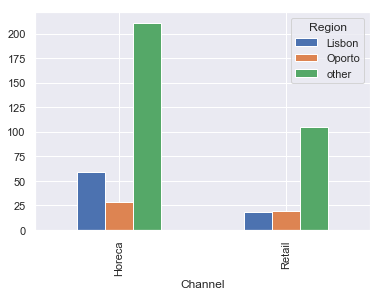

Region   Lisbon  Oporto  other
Channel                       
Horeca       59      28    211
Retail       18      19    105


In [187]:
def categorical_multi(i,j):
    pd.crosstab(dataset[i],dataset[j]).plot(kind='bar')
    plt.show()
    print(pd.crosstab(dataset[i],dataset[j]))

categorical_multi(i='Channel',j='Region')    

## Treatment of Outliers

In [247]:
list(log_data.columns)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [248]:
# replacing the outliers with their Inner fences
for k in list(log_data.columns):
    IQR = np.percentile(log_data[k],75) - np.percentile(log_data[k],25)
    
    Outlier_top = np.percentile(log_data[k],75) + 1.5*IQR
    Outlier_bottom = np.percentile(log_data[k],25) - 1.5*IQR
    
    log_data[k] = np.where(log_data[k] > Outlier_top,Outlier_top,log_data[k])
    log_data[k] = np.where(log_data[k] < Outlier_bottom,Outlier_bottom,log_data[k])

------------------------------------------------------------------------------------------------------------------------


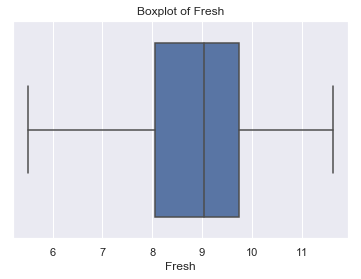

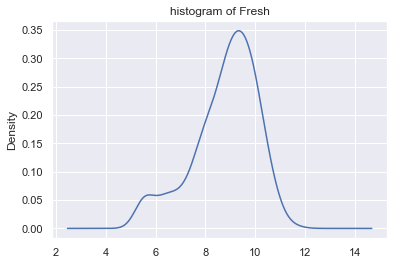

------------------------------------------------------------------------------------------------------------------------


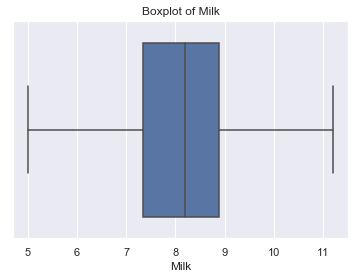

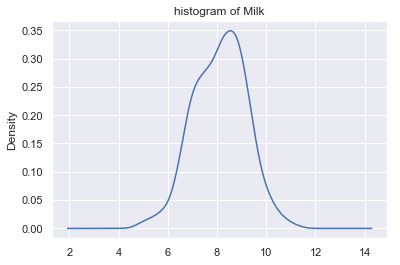

------------------------------------------------------------------------------------------------------------------------


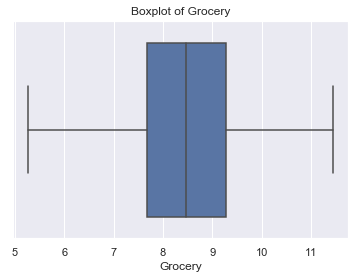

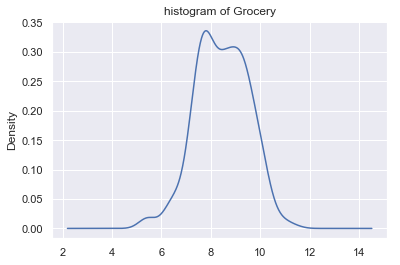

------------------------------------------------------------------------------------------------------------------------


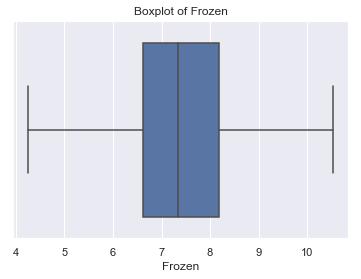

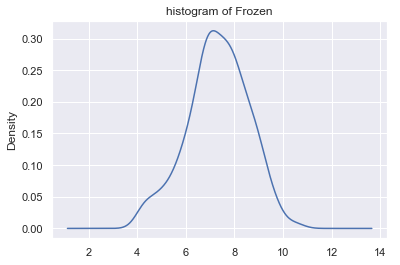

------------------------------------------------------------------------------------------------------------------------


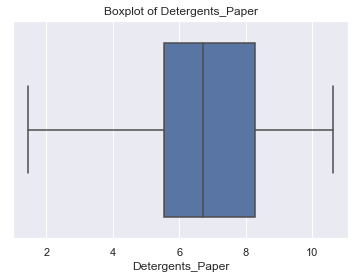

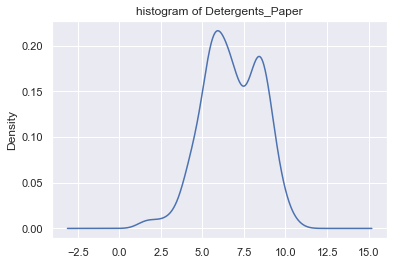

------------------------------------------------------------------------------------------------------------------------


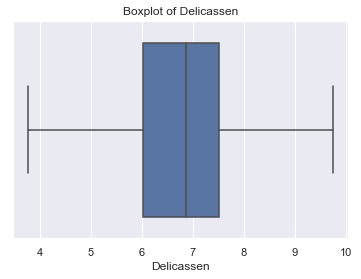

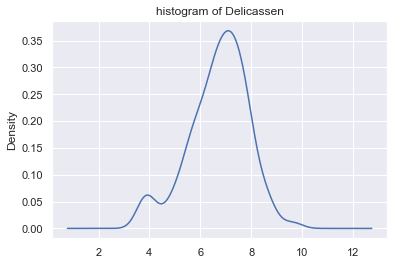

<Figure size 432x288 with 0 Axes>

In [249]:
def continous_data(i):
    if log_data[i].dtype!='object':
        print('--'*60)
        sns.boxplot(log_data[i])
        plt.title("Boxplot of "+str(i))
        plt.show()
        plt.title("histogram of "+str(i))
        log_data[i].plot.kde()
        plt.show()
        plt.clf()

for k in j:
    continous_data(i=k)        

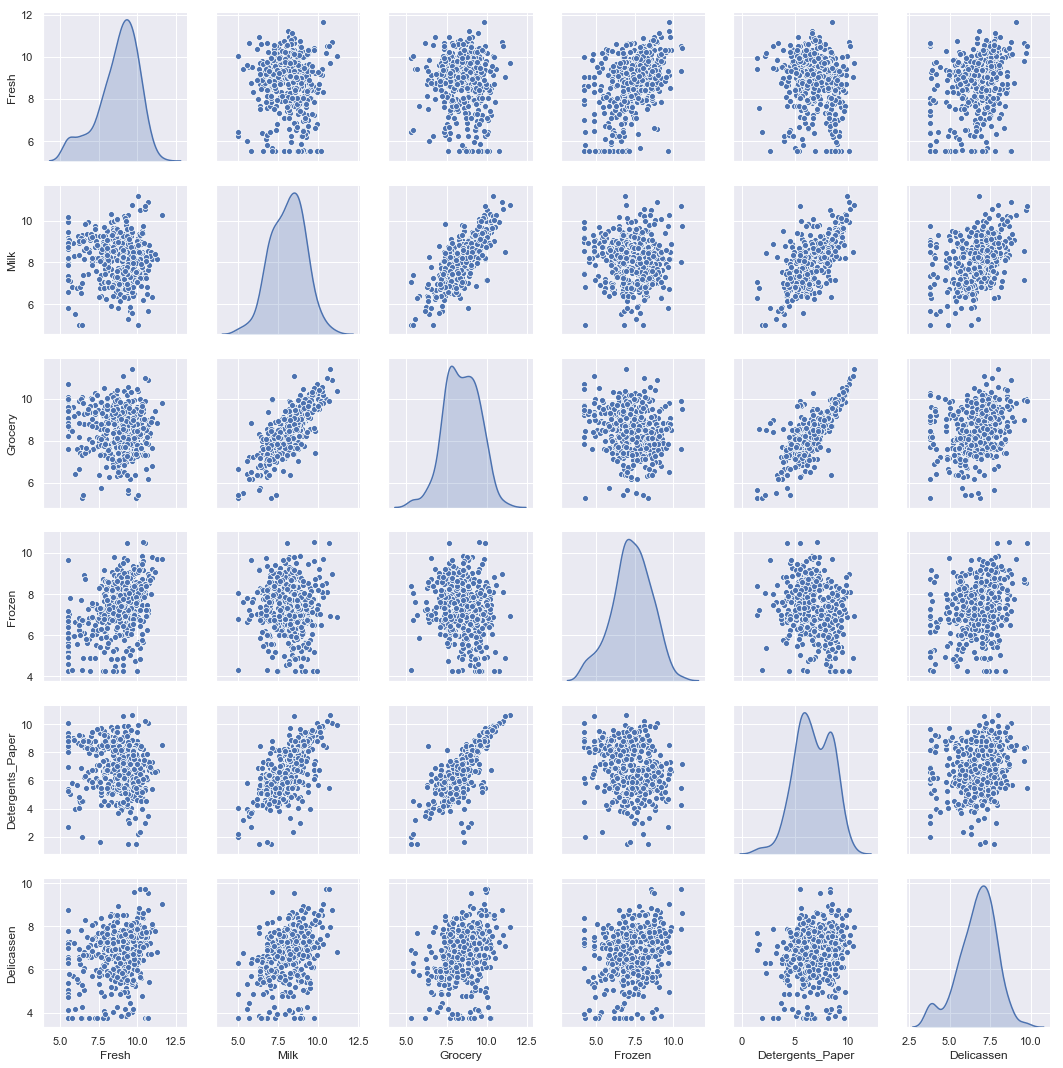

In [250]:
sns.pairplot(log_data,diag_kind = 'kde')

In [251]:
dataset1 = log_data.copy()
list(dataset1.columns)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

In [252]:
## replacing with median to treat the outliers
for k in list(dataset1.columns):
    IQR=np.percentile(dataset1[k],75) - np.percentile(dataset1[k],25)
    
    Outlier_top=np.percentile(dataset1[k],75)+1.5*IQR
    Outlier_bottom=np.percentile(dataset1[k],25)-1.5*IQR
    
    dataset1[k]=np.where(dataset1[k] > Outlier_top,np.percentile(dataset1[k],50),dataset1[k])
    dataset1[k]=np.where(dataset1[k] < Outlier_bottom,np.percentile(dataset1[k],50),dataset1[k])

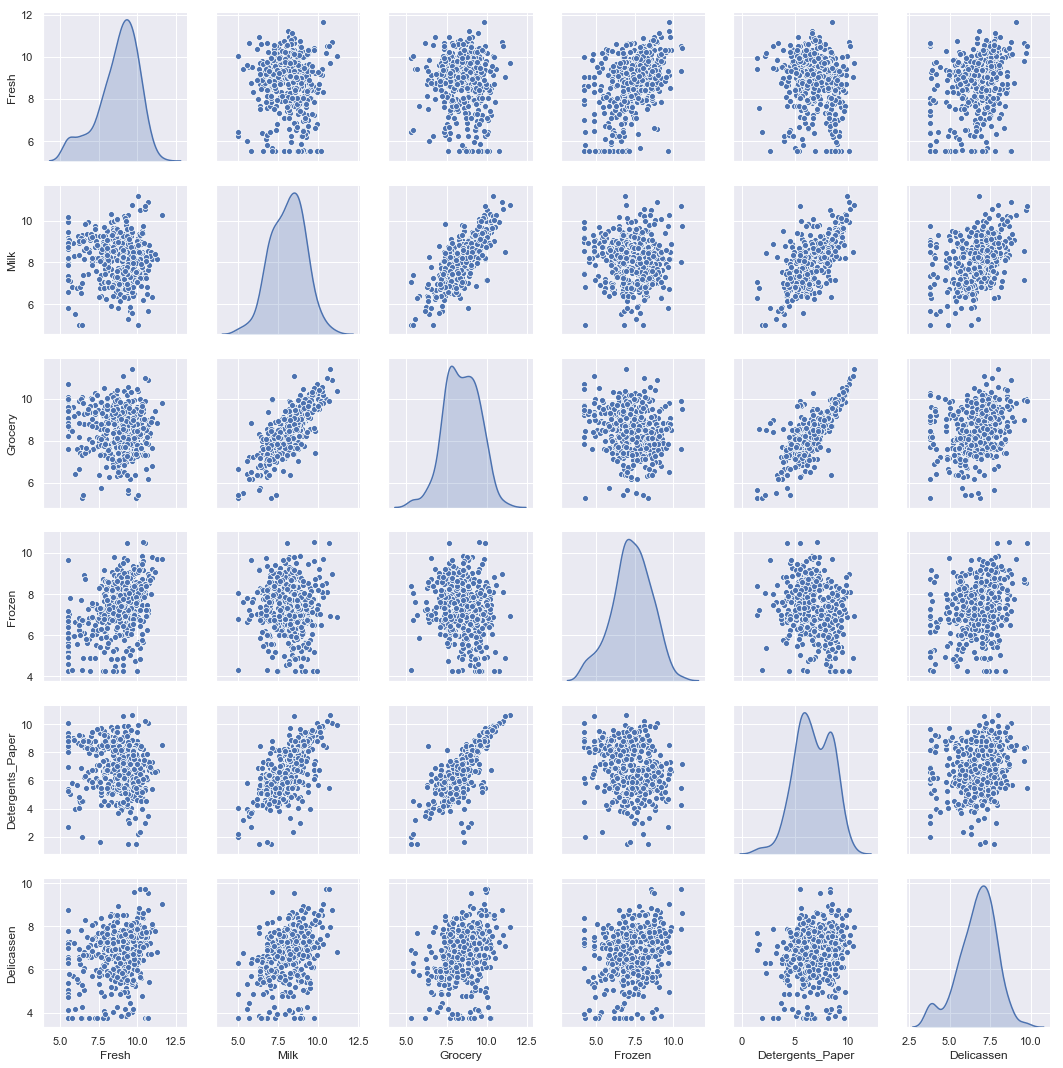

In [253]:
sns.pairplot(dataset1,diag_kind = 'kde')

## Creating dummies for categorical varibles

In [254]:
df  =  pd.concat([dataset[['Channel','Region']],log_data],axis=1)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,Retail,other,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,Retail,other,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,Retail,other,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,Horeca,other,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,Retail,other,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [255]:
df = pd.get_dummies(df,columns=['Channel','Region'],drop_first=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Retail,Region_Oporto,Region_other
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931,1,0,1
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119,1,0,1
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504,1,0,1
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853,0,0,1
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525,1,0,1


# Feature Scaling

In [256]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std,columns=df.columns)
df_std.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_Retail,Region_Oporto,Region_other
0,0.643273,0.672696,0.593130,0.176480,0.702374,0.573524,1.0,0.0,1.0
1,0.547554,0.675255,0.631333,0.512996,0.725110,0.620884,1.0,0.0,1.0
2,0.530362,0.657827,0.595748,0.562654,0.732264,0.869301,1.0,0.0,1.0
3,0.650793,0.334844,0.498532,0.718981,0.520811,0.622010,0.0,0.0,1.0
4,0.738063,0.578983,0.585145,0.640431,0.657753,0.800067,1.0,0.0,1.0


In [257]:
from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [258]:
eu_d = pdist(df_std,metric='euclidean')
clus = linkage(eu_d,method='average')
names = np.arange(0,df_std.shape[0]).tolist()

Text(0.5,1,'cluster dendogram')

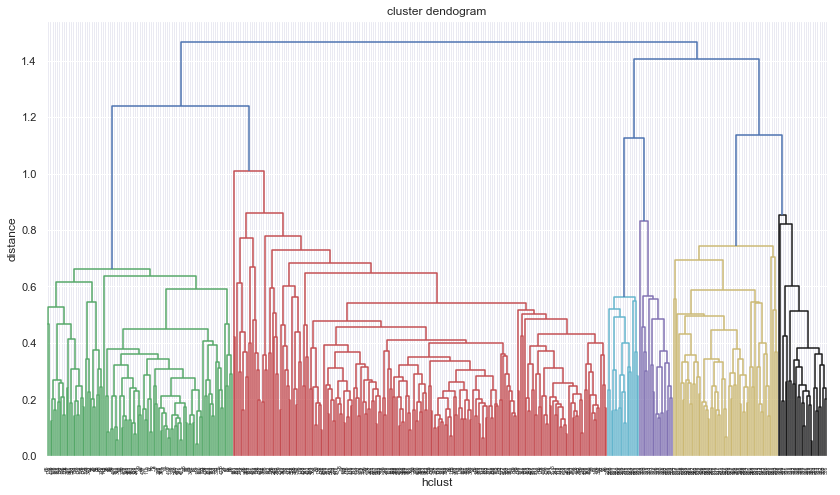

In [259]:
plt.figure(figsize=[14,8])
dendrogram(clus,labels=names)
plt.xlabel('hclust')
plt.ylabel('distance')
plt.title('cluster dendogram')

In [260]:
data_hier = data.copy()
data_hier.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [263]:
data_hier['clusters'] = cut_tree(clus,6)

In [264]:
clust_profile = data_hier.groupby(['clusters'],as_index=False).mean()
clust_profile

,clusters,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,2.0,3.0,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524
1,1,1.0,3.0,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360
2,2,1.0,1.0,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542
3,3,2.0,1.0,5200.000000,10784.000000,18471.944444,2584.111111,8225.277778,1871.944444
4,4,2.0,2.0,7289.789474,9190.789474,16326.315789,1540.578947,8410.263158,1239.000000
5,5,1.0,2.0,11650.535714,2304.250000,4395.500000,5745.035714,482.714286,1105.892857


## Kmeans Clustering

In [266]:
X = df_std.copy()

from sklearn.cluster import KMeans
cluster_range = range(1,20)
cluster_wss=[] 
for cluster in cluster_range:
    model = KMeans(cluster)
    model.fit(X)
    cluster_wss.append(model.inertia_)

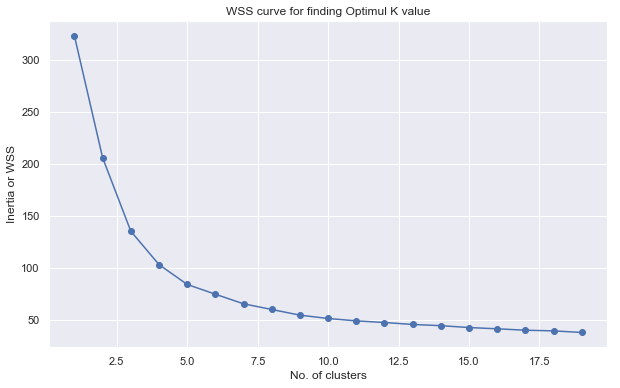

In [267]:
#PLotting Elbow curve for finding Optimal K value
plt.figure(figsize=[10,6])
plt.title('WSS curve for finding Optimul K value')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia or WSS')
plt.plot(list(cluster_range),cluster_wss,marker='o')
plt.show()

### Clustering Using K-means with K=6

In [268]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=6,random_state=0)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [269]:
dataset_final = data.copy()
dataset_final.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [270]:
dataset_final['clusters']=model.predict(X)
dataset_final.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


In [271]:
#cluster profiles
clust_prof = dataset_final.groupby(['clusters'],as_index=False).mean()
clust_prof

,clusters,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,1.0,3.0,13878.052133,3486.981043,3886.734597,3656.900474,786.682464,1518.284360
1,1,2.0,2.0,7289.789474,9190.789474,16326.315789,1540.578947,8410.263158,1239.000000
2,2,2.0,3.0,9831.504762,10981.009524,15953.809524,1513.200000,6899.238095,1826.209524
3,3,1.0,1.0,12902.254237,3870.203390,4026.135593,3127.322034,950.525424,1197.152542
4,4,2.0,1.0,5200.000000,10784.000000,18471.944444,2584.111111,8225.277778,1871.944444
5,5,1.0,2.0,11650.535714,2304.250000,4395.500000,5745.035714,482.714286,1105.892857


### PCA for getting the first 2 Principle components

In [272]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pc = pca2.fit_transform(df_std)
pc_df = pd.DataFrame(pc)
pc_df.head()

,0,1
0,0.738303,-0.263160
1,0.730184,-0.250184
2,0.731672,-0.248688
3,-0.347835,-0.315117
4,0.658015,-0.253756


In [273]:
pca = pd.concat([pc_df,dataset_final['clusters']],axis=1)
pca.columns = ['pc1','pc2','clusters']
print(pca.shape)
pca.head()

(440, 3)


,pc1,pc2,clusters
0,0.738303,-0.263160,2
1,0.730184,-0.250184,2
2,0.731672,-0.248688,2
3,-0.347835,-0.315117,0
4,0.658015,-0.253756,2


In [274]:
pca.clusters.value_counts()

0    211
2    105
3     59
5     28
1     19
4     18
Name: clusters, dtype: int64

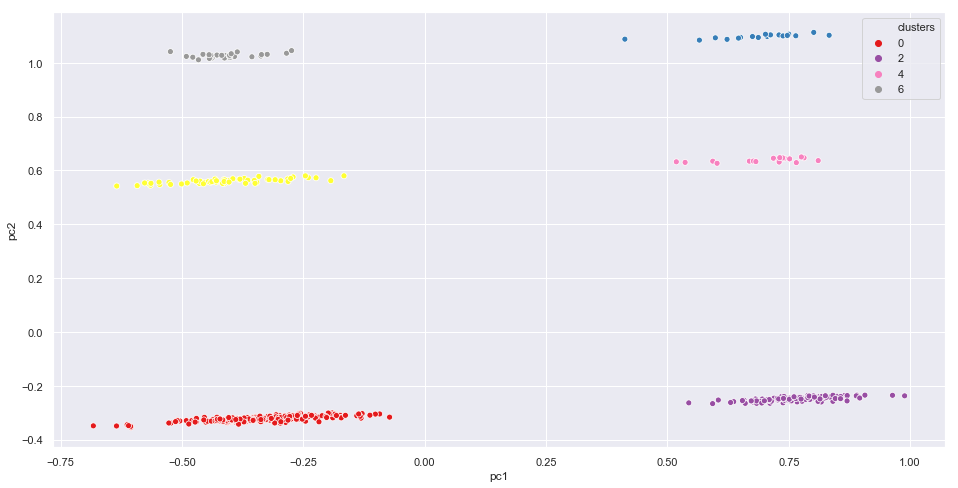

In [275]:
plt.figure(figsize=[16,8])
sns.scatterplot(x='pc1', y='pc2', hue= 'clusters', data=pca,palette='Set1')
plt.show()

## Explain what you have done and how this segments customers

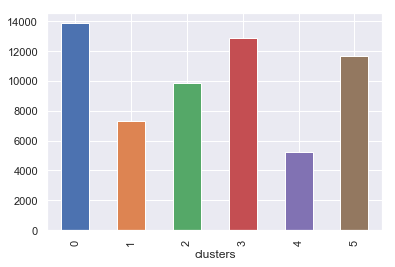

In [276]:
dataset_final.groupby('clusters').Fresh.mean().plot(kind='bar')

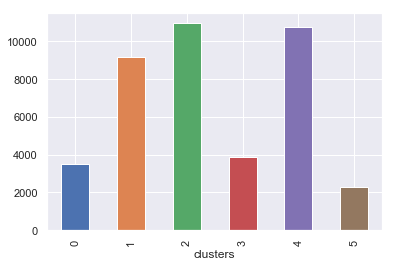

In [279]:
dataset_final.groupby('clusters').Milk.mean().plot(kind='bar')

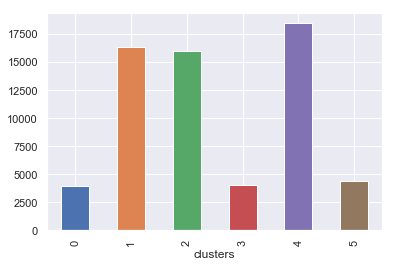

In [280]:
dataset_final.groupby('clusters').Grocery.mean().plot(kind='bar')

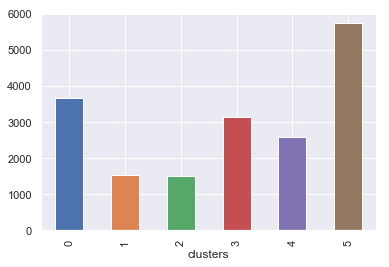

In [281]:
dataset_final.groupby('clusters').Frozen.mean().plot(kind='bar')

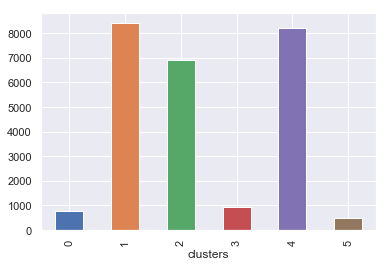

In [282]:
dataset_final.groupby('clusters').Detergents_Paper.mean().plot(kind='bar')